In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(225, 400, 3))

In [ ]:
# Create a new model by adding fully connected layers
model = Sequential()


model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [ ]:
# Freeze the weights of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model with a SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/money image/TRAIN/', target_size=(225, 400), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/money image/TEST/', target_size=(225, 400), batch_size=32, class_mode='categorical')


Found 1299 images belonging to 9 classes.
Found 398 images belonging to 9 classes.


In [ ]:
# Train the model
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))


<ipython-input-110-cee273e39fd4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))


Epoch 1/20
41/41 [==============================] - 45s 1s/step - loss: 0.4584 - accuracy: 0.8691 - val_loss: 0.6251 - val_accuracy: 0.8040
Epoch 2/20
41/41 [==============================] - 48s 1s/step - loss: 0.4408 - accuracy: 0.8622 - val_loss: 0.6204 - val_accuracy: 0.7839
Epoch 3/20
41/41 [==============================] - 50s 1s/step - loss: 0.4407 - accuracy: 0.8668 - val_loss: 0.6350 - val_accuracy: 0.8065
Epoch 4/20
41/41 [==============================] - 44s 1s/step - loss: 0.4119 - accuracy: 0.8768 - val_loss: 0.5992 - val_accuracy: 0.7915
Epoch 5/20
41/41 [==============================] - 43s 1s/step - loss: 0.4321 - accuracy: 0.8568 - val_loss: 0.6630 - val_accuracy: 0.7940
Epoch 6/20
41/41 [==============================] - 46s 1s/step - loss: 0.4570 - accuracy: 0.8560 - val_loss: 0.6202 - val_accuracy: 0.8090
Epoch 7/20
41/41 [==============================] - 45s 1s/step - loss: 0.4081 - accuracy: 0.8753 - val_loss: 0.6034 - val_accuracy: 0.7990
Epoch 8/20
41/41 [==

In [ ]:
# Evaluate the model on the test set
score = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-111-4627af2e8f2f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.5499581098556519
Test accuracy: 0.8140703439712524


In [ ]:
#Save model
model.save('/content/drive/MyDrive/AI/models/Tien.h5')

In [1]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/models/Tien.h5')

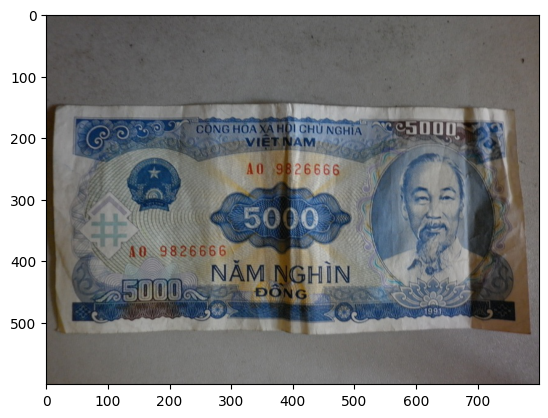

In [5]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = '5k.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 1s 1s/step


array([2])

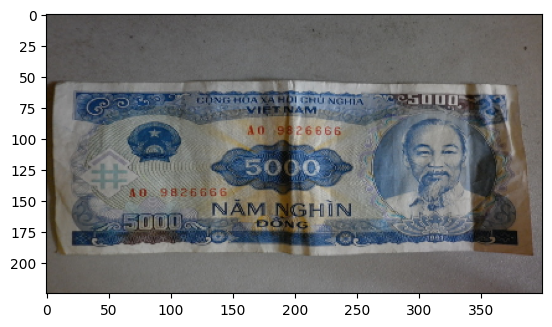

In [6]:
img = load_img(url, target_size = (225,400))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,225,400,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')